<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




Write a program that calculates  $e^{-x}$


\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


In [ ]:
import math as mt
import numpy as np
import matplotlib.pylab as plt

In [ ]:
#Caso particular
x=0.1
N=10
serie=0
for i in range(0, N):
    t=(-1)**i*x**i/(mt.factorial(i))
    serie=serie+t


In [ ]:
#Caso general
#parametros iniciales
x=0.1
N=10
def exponencial(x, N):
    serie=0
    for i in range(0, N):
        t=(-1)**i*x**i/(mt.factorial(i))
        serie=serie+t
    return serie

exponencial(x, N)

0.9048374180359596

Calculate your series for  x≤1  and compare it to the built-in function exp(x) (you may assume that the built-in exponential function is exact). You should pick an N for which the next term in the series is no more than  $10^{−7}$  of the sum up to that point


In [ ]:
def desigualdad(x,N):
    sumatoria=0
    serie_N=np.absolute((-x)**(N+1)/mt.factorial(N+1))
    for i in range(0,N+1):
        sumatoria+=((-1)**i)*((x**i)/mt.factorial(i))

    sumatoria_absoluta=(10**-7)*np.absolute(sumatoria)

    if serie_N<=sumatoria_absoluta:
        return "el valor ingresado es adecuado",N
    else:
        print("No es un valor adecuado para N")
#Ejemplo
x=0.5
N=10
resultado=desigualdad(x,N)
print(resultado)

#Ejemplo 2
x=0.5
N=7
resultado=desigualdad(x,N)
print(resultado)
#N tiene que ser mayor estricto que 7 para que sea adecuado

('el valor ingresado es adecuado', 10)
No es un valor adecuado para N
None


Examine the terms in the series for  x≈10  and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation at  n≈x−1 .



In [ ]:
def series_exponenciales(resultado):
  valores_x=np.arange(9,11,0.1)

  for i in valores_x:
    funcion_x=exponencial(i,50)
    print(f"para i={i}, la función se evalúa en {funcion_x}")

    for i in valores_x:
        funcion_n=exponencial(i-1,50)
        print(f"para n={i-1}, la función se evalúa en {funcion_n}")

resultado=exponencial(10,500)
series_exponenciales(resultado)
print("el resultado de (10,500) es:", resultado)


para i=9.0, la función se evalúa en 0.0001234098040117847
para n=8.0, la función se evalúa en 0.00033546262785295465
para n=8.1, la función se evalúa en 0.00030353913809112303
para n=8.2, la función se evalúa en 0.0002746535698686154
para n=8.299999999999999, la función se evalúa en 0.0002485168272286544
para n=8.399999999999999, la función se evalúa en 0.00022486732414094638
para n=8.499999999999998, la función se evalúa en 0.0002034683690954663
para n=8.599999999999998, la función se evalúa en 0.00018410579382416474
para n=8.699999999999998, la función se evalúa en 0.00016658581103015421
para n=8.799999999999997, la función se evalúa en 0.00015073307511559659
para n=8.899999999999997, la función se evalúa en 0.0001363889263907833
para n=8.999999999999996, la función se evalúa en 0.0001234098040117903
para n=9.099999999999996, la función se evalúa en 0.00011166580848864896
para n=9.199999999999996, la función se evalúa en 0.000101039401943471
para n=9.299999999999995, la función se ev

See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

In [ ]:
def New_exponencial(x, N):
    serie=0
    for i in range(0, N):
        t=(-1)**i*x**i/(mt.factorial(i))
        serie+=t
    return 1/serie

y=New_exponencial(0.1, 10)
print(y/np.exp(-0.1))

1.2214027581601699


In [ ]:
#Comparacion con la nueva exponencial y exponencial
#Parámetros
x=0.1
N=10
y2=New_exponencial(x, N)
t2=print(y2/np.exp(-0.1))

y=exponencial(x, N)
t=print(y/np.exp(-0.1))

1.2214027581601699
1.0000000000000002


By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

In [ ]:
def calcular_serie_expo(x,N):
    suma=0
    for n in range(N+1):
        termino=((-1)**n * x**n)/mt.factorial(n)
        suma+=termino
    return suma
x=1.0
N=10
while N < 1000:
    resultado=calcular_serie_expo(x,N)
    print(f"N={N}, Resultado={resultado}")
    N+=10


N=10, Resultado=0.3678794642857144
N=20, Resultado=0.36787944117144245
N=30, Resultado=0.36787944117144245
N=40, Resultado=0.36787944117144245
N=50, Resultado=0.36787944117144245
N=60, Resultado=0.36787944117144245
N=70, Resultado=0.36787944117144245
N=80, Resultado=0.36787944117144245
N=90, Resultado=0.36787944117144245
N=100, Resultado=0.36787944117144245
N=110, Resultado=0.36787944117144245
N=120, Resultado=0.36787944117144245
N=130, Resultado=0.36787944117144245
N=140, Resultado=0.36787944117144245
N=150, Resultado=0.36787944117144245
N=160, Resultado=0.36787944117144245
N=170, Resultado=0.36787944117144245


OverflowError: ignored

La divergencia se presenta cada vez que x se hace mayor

Make a series of graphs of the error versus N for different values of x.

In [ ]:
import mpmath

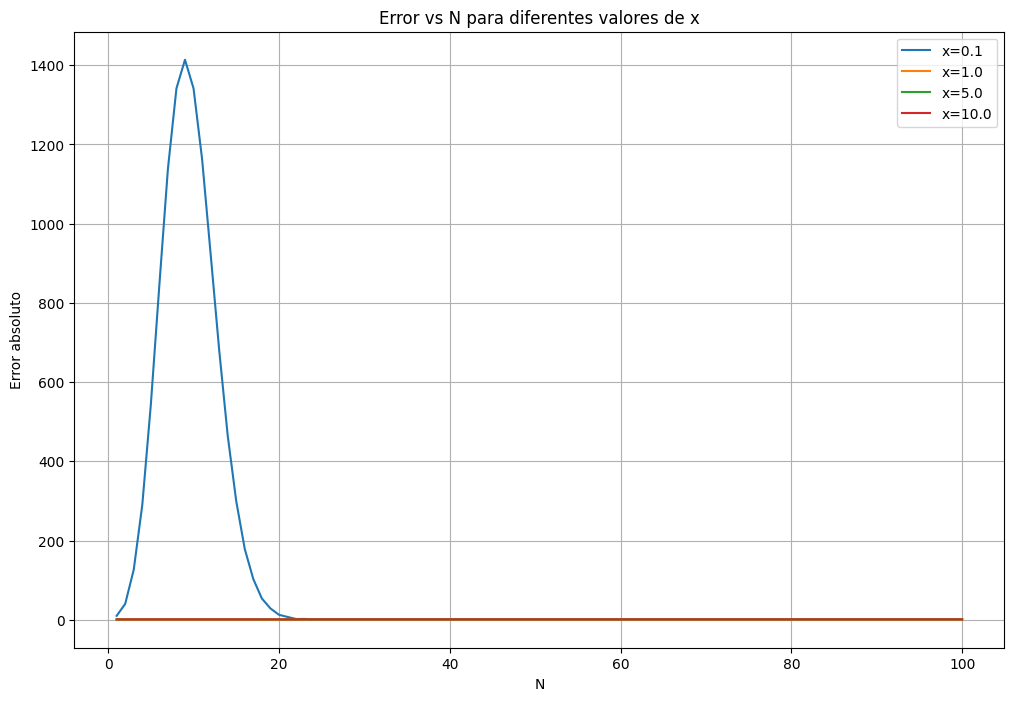

In [ ]:
mp=mpmath.mp
mp.dps=50 #precisión deseada

def calcular_serie_expo(x,N):
    if x==0:
        return 1.0 #la serie converge a 1 cuando x=0
    suma=0
    for n in range(N+1):
        termino=((-1)**n)/(mt.factorial(n) * x**n)
        suma+=termino
    return suma

def calcular_valor_exacto(x):
    return mpmath.exp(-x)

valores_N=list(range(1,101))
valores_x=[0.1,1.0,5.0,10.0]

errores={}
for x in valores_x:
    valor_exacto= calcular_valor_exacto(x)
    valor_errores=[]
    for N in valores_N:
        valor_aproximado=calcular_serie_expo(x,N)
        error=mpmath.fabs(valor_aproximado-valor_exacto)
        valor_errores.append(float(error))
    errores[x]=valor_errores

plt.figure(figsize=(12,8))
for x in valores_x:
    plt.plot(valores_N,errores[x], label=f"x={x}")

plt.xlabel("N")
plt.ylabel("Error absoluto")
plt.title("Error vs N para diferentes valores de x")
plt.legend()
plt.grid(True)
plt.show()

Nota: Utilicé la ayuda de una Inteligencia artificial para llegar a mostrar los resultados, debido a que en un inicio utilicé un código que mostraba una mejor precisión cuando N aumenta, sin embargo N aumenta con un valor grande de x y este me generaba overflow, ya que x era demasiado grande lo que directamente provoca un desvordamiento al intentar calcular $x^n$, para solucionar este problema la IA mencionó que para la visualización adecuada de la convergencia debía utilizar mpmath (una librería para calculos de alta precisión) y el proceso a seguir era calcular el error aproximado de la series en comparación con el valor exacto $e^{(-x)}$ para varios valores de N y x, le dejo la observación es con el objetivo es ser honesta.

# Cancelación sustractiva

Escribir un programa que realice el cálculo de  S(1)N ,  S(2)N  y  S(3)N

In [ ]:
def S1N(N):
    sumatoria=0
    for n in range(1,(2*N)+1):
        sumatoria+=(((-1)**n)*(n/(n+1)))
    return sumatoria
def S2N(N):
    serie_pares=0
    for i in range(1,N+1):
        serie_pares+=(((2*i)-1)/(2*i))
    serie_impares=0
    for n in range(1,N+1):
        serie_impares+=((2*n)/((2*n)+1))
    return serie_impares-serie_pares

def S3N(N):
    sumatoria=0
    for n in range(1,N+1):
        sumatoria+=(1/((2*n)*(2*n+1)))
    return sumatoria

print(S1N(2))
print(S2N(2))
print(S3N(2))

0.21666666666666667
0.21666666666666679
0.21666666666666667


Estudiar la convergencia de la serie para los tres casos.

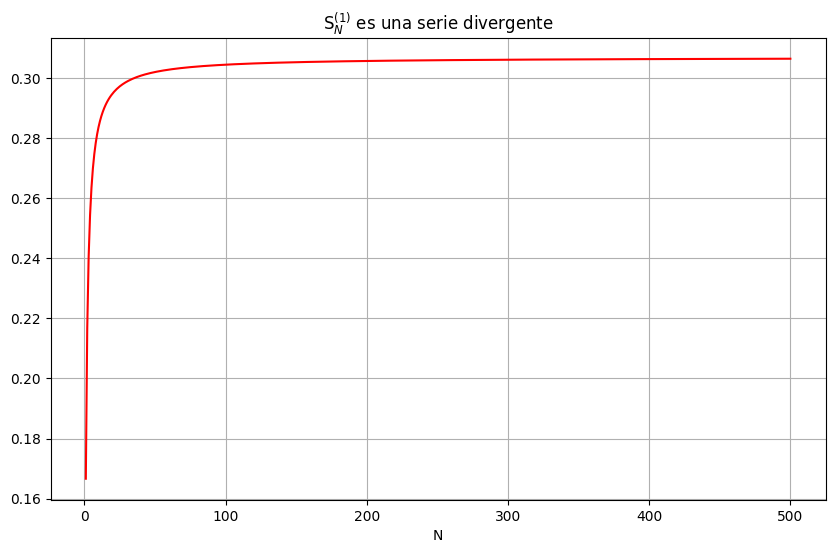

In [ ]:
#Convergencia de S1N
valores_N=np.arange(1,501)
serie_S1N=np.array([S1N(N) for N in valores_N])
plt.figure(figsize=(10,6))
plt.plot(valores_N,serie_S1N,"r")
plt.xlabel("N")
plt.title('$\mathrm{S}_N^{(1)}$ es una serie divergente')
plt.grid()
plt.show()

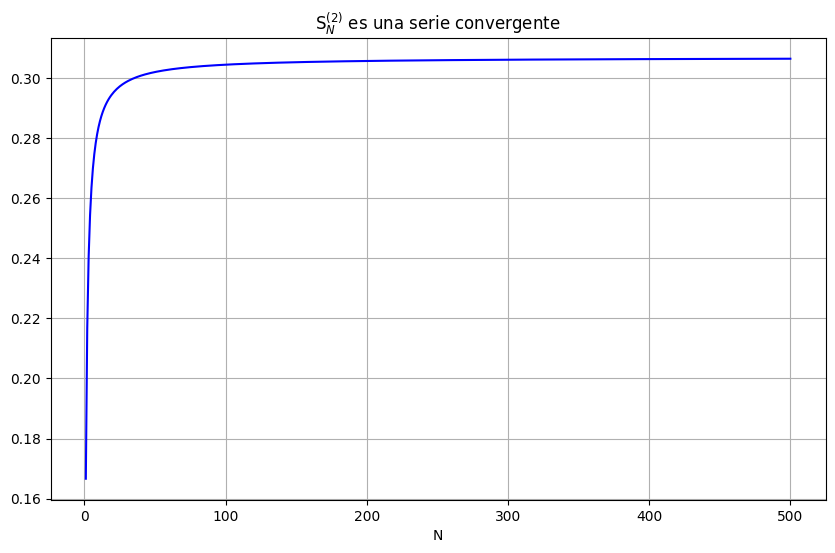

In [ ]:
#Convergencia de S2N
valores_N=np.arange(1,501)
S2N_valores=np.array([S2N(N) for N in valores_N])
plt.figure(figsize=(10,6))
plt.plot(valores_N,S2N_valores,"b")
plt.xlabel("N")
plt.title('$\mathrm{S}_N^{(2)}$ es una serie convergente')
plt.grid()
plt.show()

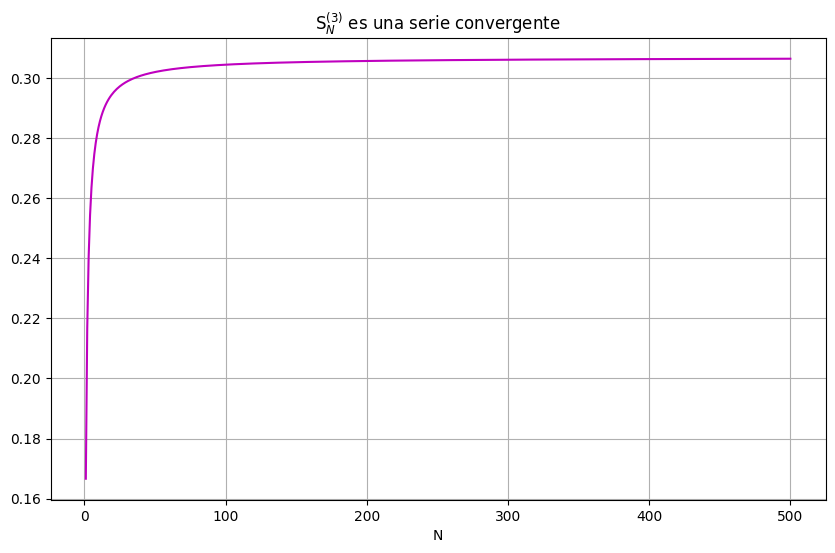

In [ ]:
#Convergencia de S3N
valores_N=np.arange(1,501)
serie_S3N=np.array([S3N(N) for N in valores_N])
plt.figure(figsize=(10,6))
plt.plot(valores_N,serie_S3N,"m")
plt.xlabel("N")
plt.title('$\mathrm{S}_N^{(3)}$ es una serie convergente')
plt.grid()
plt.show()

Considere que  S(3)N  es la solución exacta, realizar dos graficos log-log, del error relativo en función del número de términos ( Log10E  VS  Log10N ), para  S(1)N  y  S(2)N . Donde,  E=|(S(i)N−S(3)N)/S(3)N| , i = 1, 2. Considere valores de  N=1×106 .

In [ ]:
def S1N(N):
    sumatoria=0
    for n in range(1,(2*N)+1):
        sumatoria+=(((-1)**n)*(n/(n+1)))
    return sumatoria
def S2N(N):
    serie_pares=0
    for i in range(1,N+1):
        serie_pares+=(((2*i)-1)/(2*i))
    serie_impares=0
    for n in range(1,N+1):
        serie_impares+=((2*n)/((2*n)+1))
    return serie_impares-serie_pares

def S3N(N):
    sumatoria=0
    for n in range(1,N+1):
        sumatoria+=(1/((2*n)*(2*n+1)))
    return sumatoria

<ipython-input-21-1b561c676f1e>:15: RuntimeWarning: divide by zero encountered in log10
  log_S1N=np.log10(abs((S1N(n)-S3N(n))/S3N(n)))
<ipython-input-21-1b561c676f1e>:16: RuntimeWarning: divide by zero encountered in log10
  log_S2N=np.log10(abs((S2N(n)-S3N(n))/S2N(n)))


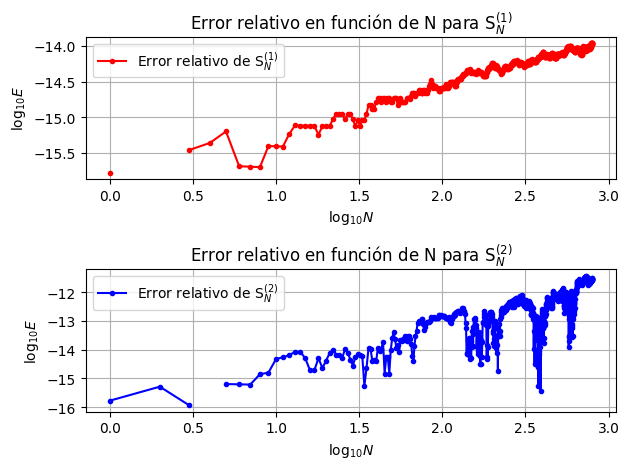

In [ ]:
def calcular_logaritmo(rango):
    return[np.log10(n) for n in rango]

valor_log_N=np.arange(1,800)

#Calcualr el logaritmo
N_log=calcular_logaritmo(valor_log_N)

#Listas de los errores relativos
Log_E1=[]
Log_E2=[]

#Calcular los errores relativos de SN1 y SN2 en función de N
for n in valor_log_N:
    log_S1N=np.log10(abs((S1N(n)-S3N(n))/S3N(n)))
    log_S2N=np.log10(abs((S2N(n)-S3N(n))/S2N(n)))
    Log_E1.append(log_S1N)
    Log_E2.append(log_S2N)

#Crear subgraficos
fig,axs=plt.subplots(2,1)

#Grafico del error relativo de SN1
axs[0].plot(N_log,Log_E1,".r-",label="Error relativo de $\mathrm{S}_N^{(1)}$")
axs[0].set_title("Error relativo en función de N para $\mathrm{S}_N^{(1)}$")
axs[0].set_xlabel("$\mathrm{log}_{10}N$")
axs[0].set_ylabel("$\mathrm{log}_{10}E$")
axs[0].legend()
axs[0].grid()

#Gráfico el error relativo de SN2
axs[1].plot(N_log,Log_E2,".b-",label="Error relativo de $\mathrm{S}_N^{(2)}$")
axs[1].set_title("Error relativo en función de N para $\mathrm{S}_N^{(2)}$")
axs[1].set_xlabel("$\mathrm{log}_{10}N$")
axs[1].set_ylabel("$\mathrm{log}_{10}E$")
axs[1].legend()
axs[1].grid()
#Ajustar diseño de la figura
fig.tight_layout()
#Muestra la gráfica
plt.show()

Note que a medida que aumenta el valor de N, aumenta el error lo que implica que son directamente proporcionales, en el graficose notan algunas variaciones, pero en su mayoría los valores se mantienen en una linea relativamente constante o por debajo de ella. Sin embargo a medida que continuamos aumentando N, los valores del error comienzan a aumentar de manera significativa, como si la recta que conecta los puntos aumentara su perdiente.

Además es importante destacar que, en algunos casos el error puede disminuir de manera drástica, lo que implica que el error no es lineal ni predecible en todos los casos.